# Project 4                                                                                         

# Title: Wrangle And Analyse WeRateDogs Twitter Archive

## Table of Contents:

<div id="contents", style="font-family:cursive">
    
> - <a href="#intro">Introduction</a>
> - <a href="#gather">Gather Data</a>
> - <a href="#assess">Assess Data</a>
> - <a href="#clean">Clean Data</a>
> - <a href="#store">Store Clean Data</a>
> - <a href="#analyze">Analyse and Visualize Clean Data</a>
    
</div>

<div id="intro", style="font-family:cursive">

## Introduction:

<p style="font-size:18px; font-weight:300">In this project we wrangle the tweet archive of Twitter user @dog_rates, also known as <a href="https://en.wikipedia.org/wiki/WeRateDogs"> WeRateDogs</a>. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. Our goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.</p>
</div>

</br>

</br>

In [1]:
# Her we import all the necessary python packages to Wrangle data

import datetime
from IPython.display import Image
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
from sqlalchemy import create_engine
from timeit import default_timer as timer
import tweepy




<div id="gather", style="font-family:cursive">

## Gather Data:
</div>

</br>

<div style="font-family:cursive; font-size:18px">

    
1. **WeRateDogs Twitter Archive** file can be downloaded manually. Download source is given from Udacity. This `twitter-archive-enhanced.csv` file containes tweets details.

2. **Tweet image predictions** file, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file `image_predictions.tsv` is hosted on Udacity's servers and can be downloaded using the Requests library and the following URL: "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

3. **Additional Tweet Data** i.e. tweet's retweet count and favorite ("like") count at minimum, and any additional data are necessary for this project. This data can be gathered using the tweet IDs in the WeRateDogs Twitter archive and querying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file.


</div>

</br>

<div style="font-family:cursive; font-size:18px">
    
**1. WeRateDogs Twitter Archive file**
</div>

In [2]:
# Create a dataframe object df_archive with twitter-archive-enhanced.csv file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


</br>


<div style="font-family:cursive; font-size:18px">
    
**2. Tweet image predictions file**
</div>

In [3]:
# Create a new folder 'image_prediction' to keep image_predictions.tsv file
folder_name='image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:

# Get the image_predictions.tsv file from the given url using 'requests'  library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [5]:

# write the content of response to the image-predictions.tsv file in the image_prediction folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:

# Create a dataframe object named df_prediction with the tsv file
df_prediction = pd.read_csv('image_prediction/image-predictions.tsv', sep='\t')
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


</br>



<div style="font-family:cursive; font-size:18px">
    
**3. Additional Tweet Data**
</div>

In [7]:
# First get the key & token details from a previously created text file
with open('key_token.txt', 'r') as file:
    api_key = file.readline()[:-1]
    api_secret_key = file.readline()[:-1]
    access_token = file.readline()[:-1]
    access_token_secret = file.readline()

In [8]:

# Create connection to api
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [9]:

# Creat a list of tweet_id
tweet_ids = np.array(df_archive.tweet_id.values)
print('Number of tweets available is {}'.format(len(tweet_ids)))
tweet_ids

Number of tweets available is 2356


array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [48]:

# Query twitter API to get JSON data for each tweet_id in the twitter archive and check the time required
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

3255.002777599999
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 844704788403113984: TweepError([{'code': 144, 'mess

</br>

In [10]:

# Read tweet_json.txt file line by line to make a list named tweet_detail_list with json objects to creat a dataframe object
tweet_detail_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        try:
            tweet_detail_list.append(json.loads(line))
        except:
            continue
            
df_api = pd.DataFrame(tweet_detail_list)
df_api.head()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [11]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
created_at                       2331 non-null object
id                               2331 non-null int64
id_str                           2331 non-null object
full_text                        2331 non-null object
truncated                        2331 non-null bool
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
source                           2331 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2331 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [12]:
df_api.retweeted.value_counts()

False    2331
Name: retweeted, dtype: int64

<div style="font-family:cursive; font-size:16px">
    
>  From the above ourcome we can see that every `retweeted` value is `False` so we can say that this table dont include any retweeted data.
</div>

In [13]:

# Create a new DataFframe object from df_api with necessary columns
df_api_necessary = df_api[['id', 'retweet_count', 'favorite_count']]
df_api_necessary.head()

,id,retweet_count,favorite_count
0,892420643555336193,7722,36255
1,892177421306343426,5706,31261
2,891815181378084864,3782,23537
3,891689557279858688,7869,39535
4,891327558926688256,8494,37750


In [14]:
print('"df_api_necessary" DataFrame has {} rows and {} columns.'. format(df_api_necessary.shape[0], df_api_necessary.shape[1]))

"df_api_necessary" DataFrame has 2331 rows and 3 columns.


In [15]:

# Make copy of the three necessary dataframes for assessment and cleaning purpose
df_archive_copy = df_archive.copy()
df_prediction_copy = df_prediction.copy()
df_necessary_copy = df_api_necessary.copy()

</br>

</br>

<div id="assess", style="font-family:cursive">

## Assess Data:
</div>

<div style="font-family:cursive; font-size:18px">

Assessment of gather data can be done in two ways -

> - Visual Assessment
> - Programatic Assessment

Main objective of data assessment is detecting Quality and Tidiness issues of data and documenting them for data cleaning process making easy.

</div>

</br>

<div style="font-family:cursive; font-size:21px">
Visual Assessment
</div>

In [16]:
df_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
df_prediction_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
df_necessary_copy

,id,retweet_count,favorite_count
0,892420643555336193,7722,36255
1,892177421306343426,5706,31261
2,891815181378084864,3782,23537
3,891689557279858688,7869,39535
4,891327558926688256,8494,37750
...,...,...,...
2326,666049248165822465,39,96
2327,666044226329800704,132,272
2328,666033412701032449,41,112
2329,666029285002620928,42,121


<div style="font-family:cursive; font-size:21px">
Programatic Assessment
</div>

In [19]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<div style="font-family:cursive; font-size:16px">

>  From the above summery we can decide to delete the columns which have more null values and will not be used in this project. And we have to change the type of tweet_id, timestamp. And create a new column dog_stage to avoid data redundancy.
    
</div>

In [20]:

# Check if there ia any duplicate value in 'tweet_id'
sum(df_archive_copy.tweet_id.duplicated())

0

In [21]:

print('duplicate entries are {} '.format(sum(df_archive_copy.source.duplicated())))
print(df_archive_copy.source[0])
print(df_archive_copy.source[14])
print(df_archive_copy.source[23])

duplicate entries are 2352 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


<div style="font-family:cursive; font-size:16px">
    
>  From the above output we conclude that we dont need `source` column as it contains just the url that is not required for the analysis. So we can drop this column.

</div>

In [22]:

# Check how many different values are there as numerator in ratings
df_archive_copy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:

# Check how many different values are there as dinominator in ratings
df_archive_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

<div style="font-family:cursive; font-size:16px">
    
>  There are different numbers in dinominator of ratings. So to make comparison according to rating we have to adjust every rating to a particular scale. Here we adjust every rating to '10' scale as 10 is maximum number in dinominatoe. And there is a '0' value so we have to delete that row.
    
</div>

In [24]:
# Check the values of name column
df_archive_copy.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
            ... 
Sailor         1
Akumi          1
Jarvis         1
Bookstore      1
Philippe       1
Name: name, Length: 957, dtype: int64

In [25]:

# Check which types of information text column contains
print(df_archive_copy['text'][1234])
print(df_archive_copy['text'][2134])

Please don't send in any more polar bears. We only rate dogs. Thank you... 10/10 https://t.co/83RGhdIQz2
This is Randall. He's from Chernobyl. Built playground himself. Has been stuck up there quite a while. 5/10 good dog https://t.co/pzrvc7wKGd


<div style="font-family:cursive; font-size:16px">
    
>  We can see that text contains dog's name, comment about the dog, rating of the dog, and link to the post. We can see that in rating numerator and denominator are integer. We can ceck if there is any floating point number in rating in text and chaeck that with rating_numerator and rating_denominator columns.
    
</div>

In [26]:

# Check if there is any float numerator in rating in text column
with pd.option_context('max_colwidth', 200):
    display(df_archive_copy[df_archive_copy['text'].str.contains(r"(\d+\.\d*\/\d+)")]
           [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

c:\users\som25\appdata\local\programs\python\python37\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


<div style="font-family:cursive; font-size:16px">
    
>  From the above result we can see that there are six columns where in text there are float in numerator in rating but in rating_numerator column all this are integer and from the above table we can conclude that text column contans the original rating and so we have to change the values in rating_numerator column. And for that first we have to change the type of rating_numerator column from int to float.
    
</div>

</br>

In [27]:
# Get an overview of the df_prediction_copy dataframe
df_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
sum(df_prediction_copy.duplicated())

0

In [29]:

# Check if there is any deplicated tweet_id or not
sum(df_prediction_copy.tweet_id.duplicated())

0

In [30]:

# Check if there is any duplicate image_url or not
sum(df_prediction_copy.jpg_url.duplicated())

66

<div style="font-family:cursive; font-size:16px">

>  We can see that there are 66 duplicate images in the df_prediction_copy table and there are not required for the analysis. So its googd to remove those duplicated rows to get appropriate concise data.
</div>

In [31]:

# Check the number of images for indivisual tweet satisfy the condition of max number of images that can be posted.
df_prediction_copy.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [32]:
df_necessary_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [33]:
df_necessary_copy.favorite_count.value_counts()

0       163
319       5
1066      4
2139      4
1219      4
       ... 
555       1
2604      1
2606      1
2608      1
2953      1
Name: favorite_count, Length: 1989, dtype: int64

In [34]:
df_necessary_copy.retweet_count.value_counts()

555     6
225     5
523     4
456     4
814     4
       ..
367     1
2416    1
4467    1
326     1
2066    1
Name: retweet_count, Length: 1689, dtype: int64

<div style="font-family:cursive">

## Data Assessment Report:
</div>

<div style="font-family:cursive; font-size:16px">

<u>
    
#### Quality Issues:

</u>

Basically this takes completeness, validity, accuracy and consistency issues.

- **df_archive_copy** Table:
>  1. Retweets are included. We should keep only the original tweets.
>  2. Remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source columns which have more Null values and are not necessary for this project.
>  3. Change type of tweet_id from 'int' to 'string'.
>  4. Change type of timestamp to datetime.
>  5. Null is identified as 'a', 'an', 'the' and 'None' for name, doggo, floofer, pupper, and puppo columns.
>  6. We have to adjust the ratings to 10 scale. And we have to delete the row which have '0' as rating_denominator. 
>  7. First change rating_numerator column type from int to float and then change values of rating_numerator of tweet_id
'883482846933004288', '832215909146226688', '786709082849828864	', '778027034220126208', '681340665377193984', '680494726643068929' according to the rating in text columns.

- **df_prediction_copy** Table:
>  1. Delete the 66 duplicated 'jpg_url' along with the entire row.
>  2. Change type of tweet_id from int to string.
>  3. Remove rows where predictions are not dog.
>  4. Get rid of data redundancy due to p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns. Use the data of these columns to make new meaningful columns and then remove these.

- **df_necessary_copy** Table:
>  1. Change the column name for `id` to `tweet_id`. And change type of column to str.

<u>
    
#### Tidiness Issues:
</u>
Basically this takes structural issues.

- **df_archive_copy** Table:
>  1. Create a new column dog_stage instead of doggo, floofer, pupper and puppo columns to get rid of data redundancy.
>  2. From the text column extract the dog's stage use them to replace the NaN values as much as possible in dog_stage column. Then remove the indivisual dog's stage columns. Then remove extra columns.

- **df_necessary_copy** Table:
>  1. Combine three clean dataframes into a single dataframe to avoid data redundancy.


</div>

</br>

</br>

<div id="clean", style="font-family:cursive">

## Clean Data:

</div>

<div style="font-family:cursive; font-size:16px">

This part of Data Wrangling process consists of three sub-process -
>  - Define 
>  - Code
>  - Test
</div>

<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  1. **df_archive_copy** Table: Retweets are included. We should keep only the original tweets.
</div>


<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [35]:

# Remove those rows where retweeted_status_user_id is not null
df_archive_copy = df_archive_copy[df_archive_copy.retweeted_status_user_id.isnull()]

<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [36]:

# Check if there is any retweet or not
print(sum(df_archive_copy.retweeted_status_id.notnull()))

0


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  2. **df_archive_copy** Table: remove `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `source` columns which have more Null values and are not necessary for this project.
</div>

<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [37]:
# Remove the columns those are not necessary
df_archive_copy = df_archive_copy.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp',
                     'source'], axis=1)


<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [38]:

# Check if there are those columns or not
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  3. **df_archive_copy** Table: Change type of tweet_id from 'int' to 'string'.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [39]:
# Change the type of the tweet_id column
df_archive_copy['tweet_id'] = df_archive_copy.tweet_id.astype(str)

<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [40]:
# Check the datatype of tweet_id column
df_archive_copy.tweet_id.dtype

dtype('O')

<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  4. **df_archive_copy** Table: Change type of timestamp to datetime.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [41]:
# Change the type of timestamp from string to datetime
df_archive_copy['timestamp'] = pd.to_datetime(df_archive_copy['timestamp'])

<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [42]:
# Check the datatype of the timestamp column
df_archive_copy.timestamp.dtype

datetime64[ns, UTC]

<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  5. **df_archive_copy** Table: Null is identified as 'a', 'an', 'the' and 'None' for name, doggo, floofer, pupper, and puppo columns.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [43]:
# Get some more occurred Names in name column
series = df_archive_copy.name.value_counts()
series.sort_values(ascending=False, inplace=True)
print(series[:21])

None       680
a           55
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Lola         8
the          8
Daisy        7
Toby         7
an           6
Bailey       6
Koda         6
Oscar        6
Bella        6
Stanley      6
Jax          6
Name: name, dtype: int64


<div style="font-family:cursive; font-size:16px">
    
> From the above summery we can see that there are 'None', 'a', 'the' and 'an' as null in the name column. So we should replace those values with NaN. 
</div>

In [44]:
# Modify those values for name column
invalid_name_list = ['None','a','an','the']
df_archive_copy.replace(invalid_name_list, np.nan, inplace=True)


<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [45]:
# Check for the effectiveness of the above code
series = df_archive_copy.name.value_counts()
series.sort_values(ascending=False, inplace=True)
print(series[:21])


Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Winston     8
Lola        8
Sadie       8
Toby        7
Daisy       7
Bella       6
Koda        6
Jax         6
Bo          6
Stanley     6
Bailey      6
Oscar       6
Buddy       5
Scout       5
Rusty       5
Name: name, dtype: int64


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  6. **df_archive_copy** Table: We have to delete the row which have '0' as rating_denominator.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [46]:
# Check for '0' value in rating_denominator
df_archive_copy.rating_denominator.value_counts()


10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [47]:

# Get the index of that particular row
i = df_archive_copy.query('rating_denominator == 0').index
print(i[0])

313


In [48]:

# Remove that row from the table
df_archive_copy.drop(i[0], inplace=True)

<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [49]:
# Check that row exists or not
df_archive_copy.query('rating_denominator == 0')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  7. **df_archive_copy** Table: First change rating_numerator column type from int to float and then change values of rating_numerator of tweet_id '883482846933004288', '832215909146226688', '786709082849828864 ', '778027034220126208', '681340665377193984', '680494726643068929' according to the rating in text columns.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [50]:
# Change the type of rating_numerator  and rating_denominator columns from int to float
df_archive_copy[['rating_numerator','rating_denominator']]=df_archive_copy[['rating_numerator','rating_denominator']].astype(float)

In [51]:

# Check for the quality issue that is defined above
with pd.option_context('max_colwidth', 200):
    display(df_archive_copy[df_archive_copy['text'].str.contains(r"(\d+\.\d*\/\d+)")]
           [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [52]:

# Modify the values of rating_numerator
df_archive_copy.loc[df_archive_copy.tweet_id=='883482846933004288', 'rating_numerator'] = 13.5
df_archive_copy.loc[df_archive_copy.tweet_id=='786709082849828864', 'rating_numerator'] = 9.75
df_archive_copy.loc[df_archive_copy.tweet_id=='778027034220126208', 'rating_numerator'] = 11.27
df_archive_copy.loc[df_archive_copy.tweet_id=='681340665377193984', 'rating_numerator'] = 9.5
df_archive_copy.loc[df_archive_copy.tweet_id=='680494726643068929', 'rating_numerator'] = 11.26

<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [53]:
# Check the type of rating_numerator and rating_denominator
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null datetime64[ns, UTC]
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null float64
name                  1426 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 203.8+ KB


In [54]:

# Check for float rating_numerator and that in the text column
with pd.option_context('max_colwidth', 200):
    display(df_archive_copy[df_archive_copy['text'].str.contains(r"(\d+\.\d*\/\d+)")]
           [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  8. **df_prediction_copy** Table: Delete the 66 duplicated 'jpg_url' along with the entire row.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [55]:

# Remove the rows which have duplicate jpg_url
df_prediction_copy = df_prediction_copy.drop_duplicates(subset=['jpg_url'], keep='last')

<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [56]:

# Check if there is any duplicate jpg_url or not
sum(df_prediction_copy.jpg_url.duplicated())

0

<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  9. **df_prediction_copy** Table: Change type of tweet_id from int to string.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>


In [57]:

# Change the type of tweet_id to string
df_prediction_copy['tweet_id'] = df_prediction_copy['tweet_id'].astype(str)

c:\users\som25\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [58]:

# Check for the modified type of tweet_id
df_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  10. **df_prediction_copy** Table: Remove rows where predictions are not dog.
</div>


<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>


In [59]:

# Remove those rows where predictions are not dogs
not_dog_list = df_prediction_copy.query('p1_dog==False & p2_dog==False & p3_dog==False').index

df_prediction_copy.drop(index=not_dog_list, inplace=True)

c:\users\som25\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>


In [60]:
# Check if there is any row which contain
df_prediction_copy.query('p1_dog==False & p2_dog==False & p3_dog==False')


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [61]:
df_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1691 non-null object
jpg_url     1691 non-null object
img_num     1691 non-null int64
p1          1691 non-null object
p1_conf     1691 non-null float64
p1_dog      1691 non-null bool
p2          1691 non-null object
p2_conf     1691 non-null float64
p2_dog      1691 non-null bool
p3          1691 non-null object
p3_conf     1691 non-null float64
p3_dog      1691 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 137.1+ KB


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  11. **df_archive_copy** Table: Create a new column `dog_stage` instead of doggo, floofer, pupper and puppo columns to get rid of data redundancy.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [62]:

# Check if there are any rows where more than one dog's stage available
df_archive_copy[df_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].notnull().sum(axis=1)>1]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10.0,NaN,doggo,NaN,NaN,puppo
200,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10.0,NaN,doggo,floofer,NaN,NaN
460,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,NaN,doggo,NaN,pupper,NaN
565,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11.0,10.0,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,2016-09-29 01:42:20+00:00,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12.0,10.0,NaN,doggo,NaN,pupper,NaN
889,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,doggo,NaN,pupper,NaN
956,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,NaN,doggo,NaN,pupper,NaN


In [63]:

# Concatenate all the dog stages columns in one column called dog_stage
df_archive_copy['dog_stage'] = df_archive_copy.loc[:, 'doggo':'puppo'].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [64]:

# Check the dog_stage column and its values
df_archive_copy.dog_stage.value_counts()

                 1830
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  12. **df_archive_copy** Table: From the text column extract the dog's stage use them to replace the NaN values as much as possible in `dog_stage` column. Then remove the indivisual dog's stage columns.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [65]:

# Check for dog types in text column
dog_type = ['doggo', 'floofer', 'pupper' , 'puppo']
for t in dog_type:
    print(t, df_archive_copy.text.str.contains(t).sum())

doggo 88
floofer 4
pupper 250
puppo 32


In [66]:

# Extract the dog types from the text column and create a new column dog_type with those values
dog_type = ['doggo', 'floofer', 'pupper' , 'puppo']
pattern = '|'.join(dog_type)
df_archive_copy['dog_type'] = df_archive_copy['text'].str.extract('('+pattern+')', expand=False)
df_archive_copy['dog_type'].value_counts()


pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_type, dtype: int64

In [67]:
# Create a new column 'dog_stages' by merging two columns 'dog_stage' and 'dog_type'
df_archive_copy['dog_stages'] = df_archive_copy.dog_type.fillna(df_archive_copy.dog_stage)


In [68]:
# Drop the unused columns 'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage' and 'dog_type'
df_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage', 'dog_type'], axis=1, inplace=True)


<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [69]:
# Check the values of dog_stages column
df_archive_copy.dog_stages.value_counts()


                1791
pupper           250
doggo             90
puppo             33
floofer            9
doggo,pupper       1
Name: dog_stages, dtype: int64

In [70]:
# Check the present columns
df_archive_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null datetime64[ns, UTC]
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null float64
name                  1426 non-null object
dog_stages            2174 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 152.9+ KB


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  13. **df_prediction_copy** Table: Get rid of data redundancy due to p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns. Use the data of these columns to make new meaningful columns and then remove these.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [71]:
# Create three new dataframe for three predictions respectively
pred_1 = df_prediction_copy.query('p1_dog==True')[['tweet_id', 'p1', 'p1_conf']]
pred_2 = df_prediction_copy.query('p1_dog==False & p2_dog ==True')[['tweet_id', 'p2', 'p2_conf']]
pred_3 = df_prediction_copy.query('p1_dog==False & p2_dog ==False & p3_dog ==True')[['tweet_id', 'p3', 'p3_conf']]


In [72]:
# Rename columns names of three new dataframe
pred_1.columns = ['tweet_id','predictions', 'confidence']
pred_2.columns = ['tweet_id','predictions', 'confidence']
pred_3.columns = ['tweet_id','predictions', 'confidence']

# Concate three new dataframe into a new dataframe
pred_new = pd.concat([pred_1, pred_2, pred_3])
pred_new.count()

tweet_id       1691
predictions    1691
confidence     1691
dtype: int64

In [73]:
# Merge the pred_new dataframe to the df_prediction_copy dataframe
df_prediction_copy = pd.merge(df_prediction_copy, pred_new, on='tweet_id', how='left')


In [74]:
# Drop the not necessary columns for this analysis
df_prediction_copy.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)


<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [75]:
# Check the df_prediction_copy dataframe
df_prediction_copy.sample(5)


,tweet_id,jpg_url,img_num,predictions,confidence
600,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331
741,704499785726889984,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,Chihuahua,0.376541
1327,810284430598270976,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1,malamute,0.620768
1080,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,1,Labrador_retriever,0.778546
644,693942351086120961,https://pbs.twimg.com/media/CaFg41YWkAAdOjy.jpg,1,groenendael,0.550796


In [76]:
# Get summery about the df_prediction_copy
df_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1690
Data columns (total 5 columns):
tweet_id       1691 non-null object
jpg_url        1691 non-null object
img_num        1691 non-null int64
predictions    1691 non-null object
confidence     1691 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 79.3+ KB


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  14. **df_necessary_copy** Table: Change the column name for id to tweet_id. And change type of column to str.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [77]:
# Change column name 
df_necessary_copy.rename(columns={'id':'tweet_id'}, inplace=True)


In [78]:
# Change type of tweet_id column from int to str
df_necessary_copy['tweet_id'] = df_necessary_copy['tweet_id'].astype(str)


<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>

In [79]:
# Check the dataframe status
df_necessary_copy.sample(5)


,tweet_id,retweet_count,favorite_count
475,813800681631023104,1802,8479
2050,670840546554966016,187,562
977,747933425676525569,2545,6612
1161,718613305783398402,477,2419
1417,696877980375769088,709,2430


In [80]:
# Check the tweet_id type
df_necessary_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


<div style="font-family:cursive; font-size:16px">
    
#### Define:    
>  15. Combine three clean dataframes into a single dataframe to avoid data redundancy.
</div>



<div style="font-family:cursive; font-size:16px">
    
#### Code:   
</div>

In [81]:
# Check the status and short summery for all the three dataframes before the merge
df_archive_copy.head()


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,


In [82]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null datetime64[ns, UTC]
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null float64
rating_denominator    2174 non-null float64
name                  1426 non-null object
dog_stages            2174 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 152.9+ KB


In [83]:
df_prediction_copy.head()

,tweet_id,jpg_url,img_num,predictions,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [84]:
df_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1690
Data columns (total 5 columns):
tweet_id       1691 non-null object
jpg_url        1691 non-null object
img_num        1691 non-null int64
predictions    1691 non-null object
confidence     1691 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 79.3+ KB


In [85]:
df_necessary_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7722,36255
1,892177421306343426,5706,31261
2,891815181378084864,3782,23537
3,891689557279858688,7869,39535
4,891327558926688256,8494,37750


In [86]:
df_necessary_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [87]:
# Merge df_archive_copy and df_prediction_copy dataframes into df_twitter_1
df_twitter_1 = pd.merge(df_archive_copy, df_prediction_copy, on = ['tweet_id'], how = 'left')

# Keep those rows which have jpg_url not null
df_twitter_1 = df_twitter_1[df_twitter_1.jpg_url.notnull()]


In [88]:
# Merge df_twitter_1 and df_necessary_copy dataframes into a new df_twitter
df_twitter = pd.merge(df_twitter_1, df_necessary_copy, on = ['tweet_id'], how = 'left')


<div style="font-family:cursive; font-size:16px">
    
#### Test:   
</div>


In [89]:
# Check the new dataframes
df_twitter_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2173
Data columns (total 12 columns):
tweet_id              1626 non-null object
timestamp             1626 non-null datetime64[ns, UTC]
text                  1626 non-null object
expanded_urls         1626 non-null object
rating_numerator      1626 non-null float64
rating_denominator    1626 non-null float64
name                  1165 non-null object
dog_stages            1626 non-null object
jpg_url               1626 non-null object
img_num               1626 non-null float64
predictions           1626 non-null object
confidence            1626 non-null float64
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 165.1+ KB


In [90]:
df_twitter.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 14 columns):
tweet_id              1626 non-null object
timestamp             1626 non-null datetime64[ns, UTC]
text                  1626 non-null object
expanded_urls         1626 non-null object
rating_numerator      1626 non-null float64
rating_denominator    1626 non-null float64
name                  1165 non-null object
dog_stages            1626 non-null object
jpg_url               1626 non-null object
img_num               1626 non-null float64
predictions           1626 non-null object
confidence            1626 non-null float64
retweet_count         1620 non-null float64
favorite_count        1620 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), object(7)
memory usage: 190.5+ KB


In [91]:
df_twitter.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,predictions,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5706.0,31261.0
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3782.0,23537.0
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,7869.0,39535.0
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8494.0,37750.0
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,2842.0,19015.0


</br>

</br>

</br>

<div id="store", style="font-family:cursive; font-size:16px">
    
## Store Clean Data

</div>

<div style="font-family:cursive; font-size:16px">
    
> Clean data is stored for the future analysis purpose. Data can be stored as `flat file` or in `relational databases` like SQLite.

</div>

In [92]:
# Store the df_twitter clean dataframe as twitter_archive_master.csv file
df_twitter.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')


In [94]:
# Store the dataframe in the sqlite database using sqlalchemy in a table called 'master' in 'twitter.db'
# First create a SQLAlchemy engine and an empty 'twitter.db' database 
engine = create_engine('sqlite:///twitter.db')

# Create a table called 'master' using the dataframe in 'twitter.db' database
df_twitter.to_sql('master', engine, index=False)


In [95]:
# Check the data stored as csv file
df = pd.read_csv('twitter_archive_master.csv')
df.head(3)


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,predictions,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5706.0,31261.0
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3782.0,23537.0
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,7869.0,39535.0


In [96]:
# Check the data stored in sqlite database in 'master' table
df1 = pd.read_sql('SELECT * FROM master', engine)
df1.head(3)


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,predictions,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27.000000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5706.0,31261.0
1,891815181378084864,2017-07-31 00:18:03.000000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3782.0,23537.0
2,891689557279858688,2017-07-30 15:58:51.000000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,7869.0,39535.0


</br>


</br>

</br>

</br>

<div id="analyze", style="font-family:cursive; font-size:16px">
    
## Analyze and visualize data

</div>

<div style="font-family:cursive; font-size:16px">
    
> After wrangling the data we can analyze and visualize the dataset for getting the patterns and trends of the data.

</div>

In [97]:
# Create a new dataframe for the purpose of nanlysis from the csv file that is created before.
df = pd.read_csv('twitter_archive_master.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 14 columns):
tweet_id              1626 non-null int64
timestamp             1626 non-null object
text                  1626 non-null object
expanded_urls         1626 non-null object
rating_numerator      1626 non-null float64
rating_denominator    1626 non-null float64
name                  1165 non-null object
dog_stages            277 non-null object
jpg_url               1626 non-null object
img_num               1626 non-null float64
predictions           1626 non-null object
confidence            1626 non-null float64
retweet_count         1620 non-null float64
favorite_count        1620 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 178.0+ KB


<div style="font-family:cursive; font-size:16px">
    
### Insight 1: Highest Rating

</div>

In [98]:
# Create a new column called 'rating'.
# All the values of the 'rating' column is adjusted to 10 scale so that we can compare according to their ratings.

df['rating'] = df['rating_numerator'] / df['rating_denominator'] * 10
df.rating.value_counts()


12.000000    407
10.000000    355
11.000000    348
13.000000    211
9.000000     133
8.000000      68
7.000000      31
14.000000     21
6.000000      16
5.000000      14
4.000000       6
3.000000       5
2.000000       3
9.750000       1
8.181818       1
0.000000       1
34.285714      1
13.500000      1
11.260000      1
11.270000      1
6.363636       1
Name: rating, dtype: int64

In [99]:
# Get the sorted list of ratings
df.rating.sort_values(ascending=False)


338     34.285714
482     14.000000
57      14.000000
246     14.000000
32      14.000000
          ...    
808      3.000000
1541     2.000000
746      2.000000
1188     2.000000
206      0.000000
Name: rating, Length: 1626, dtype: float64

In [100]:
df.rating.nlargest(3)

338    34.285714
8      14.000000
32     14.000000
Name: rating, dtype: float64

<div style="font-family:cursive; font-size:16px">
    
> - Top three ratings are `34.28`, `14.0`, `14.0`.

</div>

In [101]:
# Get image url of the top 3 higher rated dog
df.loc[df.rating.nlargest(3).index].jpg_url


338    https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
8      https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
32     https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg
Name: jpg_url, dtype: object

In [102]:
# Get the images of the top three higher rated dogs.
# Highest rated dog's image.
url = df.loc[df.rating.nlargest(3).index[0]].jpg_url
print(df.loc[df.rating.nlargest(3).index[0]].text)
Image(url=url, width=150, height=150)


Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [103]:
# Second higher dog's image.
url = df.loc[df.rating.nlargest(3).index[1]].jpg_url
print(df.loc[df.rating.nlargest(3).index[1]].text)
Image(url=url, width=150, height=150)


This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A


In [104]:
# Third higher dog's image.
url = df.loc[df.rating.nlargest(3).index[2]].jpg_url
print(df.loc[df.rating.nlargest(3).index[2]].text)
Image(url=url, width=150, height=150)


I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC


<div style="font-family:cursive; font-size:16px">
    
### Insight 2: Popular Dog's name

</div>

In [105]:
# Get the values of dog's name
df.name.value_counts()


Charlie     10
Lucy        10
Cooper      10
Oliver       9
Tucker       8
            ..
Jarod        1
Mingus       1
Rey          1
Sailor       1
Philippe     1
Name: name, Length: 824, dtype: int64

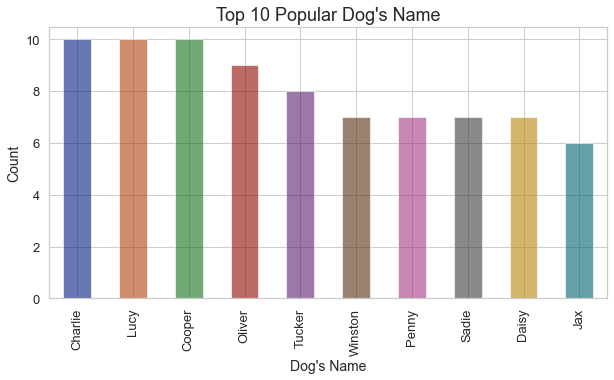

In [107]:
# See the top 10 more popular dog's name and plot a bar diagram and label the plot
df.name.value_counts().head(10).plot(kind='bar', fontsize=13, color=sns.color_palette('dark'), alpha=.6)
plt.title('Top 10 Popular Dog\'s Name', fontsize=18)
plt.xlabel('Dog\'s Name', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set the size and background of the plot
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')

fig = plt.gcf() 
fig.savefig('popular_dog_name.jpg',bbox_inches='tight')


<div style="font-family:cursive; font-size:16px">
    
> - Most popular dog's names are `Charlie`, `Cooper`, `Lucy`.

</div>

<div style="font-family:cursive; font-size:16px">
    
### Insight 3: Dog's Stage

</div>

In [108]:
# Get the values of dog_stages
df.dog_stages.value_counts()


pupper     183
doggo       60
puppo       27
floofer      7
Name: dog_stages, dtype: int64

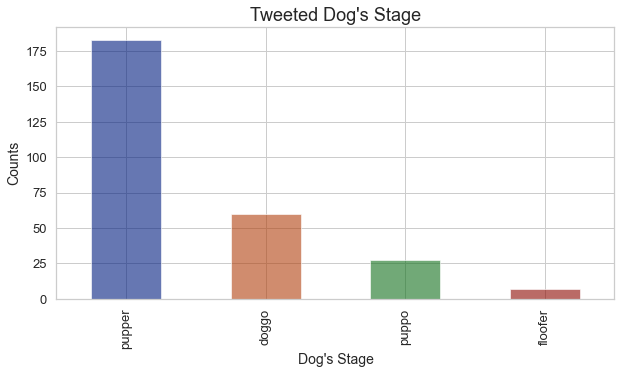

In [109]:
# Plot the values of dog_stages along with their occurance to get a better visualization
df.dog_stages.value_counts().plot(kind='bar', fontsize=13, figsize=(10,5), color=sns.color_palette('dark'), alpha=.6)
plt.title('Tweeted Dog\'s Stage', fontsize=18)
plt.xlabel('Dog\'s Stage', fontsize=14)
plt.ylabel('Counts', fontsize=14)

fig = plt.gcf() 
fig.savefig('tweet_type.jpg',bbox_inches='tight')


<div style="font-family:cursive; font-size:16px">
    
> - More tweeted dogs are in `pupper` stage and least in `floofer` stages.

</div>

<div style="font-family:cursive; font-size:16px">
    
### Insight 4: Dog's Breed Prediction

</div>

In [110]:
# Get the values of dog's breed prediction
df.predictions.value_counts()


golden_retriever        143
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
Scotch_terrier            1
Bouvier_des_Flandres      1
clumber                   1
EntleBucher               1
standard_schnauzer        1
Name: predictions, Length: 113, dtype: int64

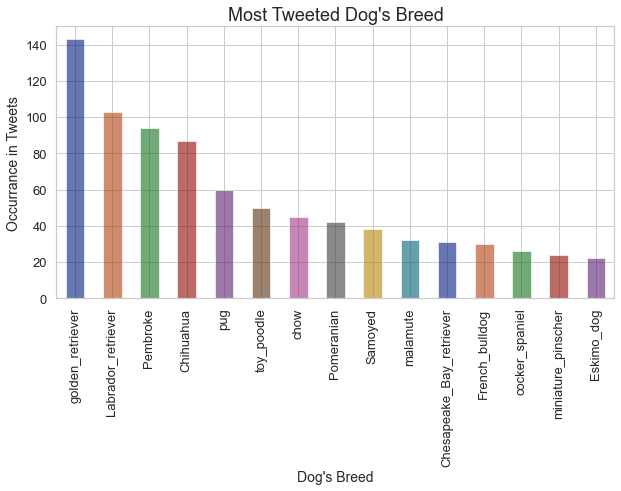

In [111]:
# Plot a bar diagram to get a better visualization about the most occurrable dog's breed  
df.predictions.value_counts().head(15).plot(kind='bar', fontsize=13, figsize=(10,5), color=sns.color_palette('dark'), alpha=.6)
plt.title('Most Tweeted Dog\'s Breed', fontsize=18)
plt.xlabel('Dog\'s Breed', fontsize=14)
plt.ylabel('Occurrance in Tweets', fontsize=14)

fig=plt.gcf()
fig.savefig('dog_breed.jpg',bbox_inches='tight')


<div style="font-family:cursive; font-size:16px">
    
> - `Golden Retriever` is the top dog's breed, to which highest number of dogs belongs to. And this followed by `Labrador Retriever` and `Pembroke`.

</div>

<div style="font-family:cursive; font-size:16px">
    
### Insight 5: Dog's Breed Prediction Confidence

</div>

In [112]:
# Get the prediction confidence values of neural network
df.confidence.sort_values(ascending=False)


1510    0.999956
533     0.999953
954     0.999885
1273    0.999876
823     0.999837
          ...   
408     0.000083
477     0.000077
294     0.000062
645     0.000014
585     0.000010
Name: confidence, Length: 1626, dtype: float64

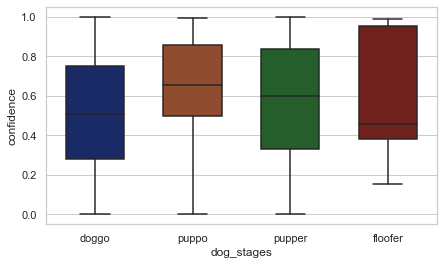

In [114]:
# Draw a box plot to get an idea about which dog's stage is more predictable through neural network.
sns.boxplot(x='dog_stages', y='confidence', data=df, palette='dark', saturation=.6, width=.6)
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style('whitegrid')
plt.savefig('boxplot.jpg')


<div style="font-family:cursive; font-size:16px">
    
> - From the median values(Q2) we can say that `puppo` is more predictable than any other stages of dogs.

</div>

</br>

<div style="font-family:cursive; font-size:16px">
    
### Visualization 1: Retweet & Rating

</div>

In [115]:
# Get the values of retweet_count column
df.retweet_count.sort_values(ascending=False)


652     77955.0
677     57781.0
273     43913.0
52      40618.0
98      33021.0
         ...   
171         NaN
196         NaN
460         NaN
576         NaN
1162        NaN
Name: retweet_count, Length: 1626, dtype: float64

Correlation Coefficient is:  0.2728296705


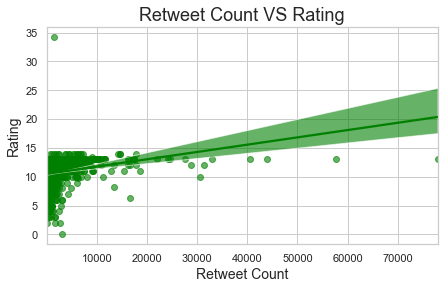

In [116]:
# Draw a scatterplot to get an idea about the relation between retweet_count and the rating of a dog's post
tweet_rating = sns.regplot(x=df.retweet_count, y=df.rating, color='green')
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')
plt.title('Retweet Count VS Rating', fontsize=18)
plt.xlabel('Retweet Count', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.setp(tweet_rating.collections, alpha=.6)

# Get the correlation coefficient
print('Correlation Coefficient is: ', df.corr().loc['retweet_count', 'rating'].round(10))

<div style="font-family:cursive; font-size:16px">
    
> - From the above plot and the correlation coefficient(i.e. 0.273), we can say that rating of a dog slightly depends on the retweet_count of that dog. Means if a dog's post has more retweet then its likely to has higher rating.

</div>

<div style="font-family:cursive; font-size:16px">
    
### Visualization 2: Favorite & Rating

</div>

In [117]:
# Get the values of the favorite_count column
df.favorite_count.sort_values(ascending=False)


652     156400.0
273     133263.0
98      116571.0
677     115586.0
52       99385.0
          ...   
171          NaN
196          NaN
460          NaN
576          NaN
1162         NaN
Name: favorite_count, Length: 1626, dtype: float64

Correlation Coefficient is:  0.3698804105


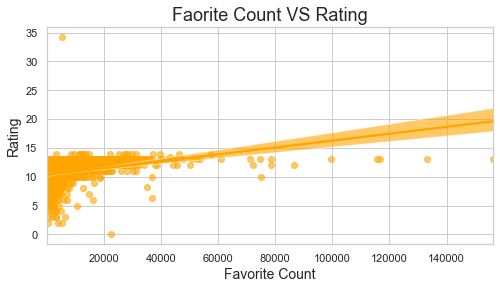

In [118]:
# Draw a scatterplot between favorite_count and rating of a dog to get an idea about the relationship between them.
fav_rating = sns.regplot(x=df.favorite_count, y=df.rating, color='orange')
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')
plt.title('Faorite Count VS Rating', fontsize=18)
plt.xlabel('Favorite Count', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.setp(fav_rating.collections, alpha=.6)

# Get the correlation coefficient
print('Correlation Coefficient is: ', df.corr().loc['favorite_count', 'rating'].round(10))

<div style="font-family:cursive; font-size:16px">
    
> - From the above plot and the correlation coefficient(i.e. 0.369), we can say that rating of a dog depends on the favorite_count of that dog. Means if a dog is more favorite then its likely to be higher rated.

</div>

<div style="font-family:cursive; font-size:16px">
    
### Visualization 3: Retweet & Favorite

</div>

Correlation Coefficient is:  0.9266136846


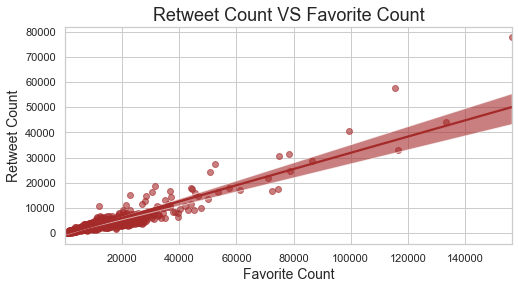

In [119]:
# Plot a scatter plot to see the relation between the favorite_count and retweet_count
retweet_fav = sns.regplot(x=df.favorite_count, y=df.retweet_count, color='brown')
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')
plt.title('Retweet Count VS Favorite Count', fontsize=18)
plt.xlabel('Favorite Count', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14)
plt.setp(retweet_fav.collections, alpha=.6)

fig=plt.gcf()
fig.savefig('retweet_fav.jpg',bbox_inches='tight')
# Get the correlation coefficient
print('Correlation Coefficient is: ', df.corr().loc['retweet_count', 'favorite_count'].round(10))


<div style="font-family:cursive; font-size:16px">
    
> - From the above plot and the correlation coefficient(i.e. 0.926), we can say that retweet of a dog depends on the favorite_count of that dog. Means if a dog is more favorite then its likely to be retweeted more.

</div>

<div style="font-family:cursive; font-size:16px">
    
### Visualization 4: Retweet & Dog type

</div>

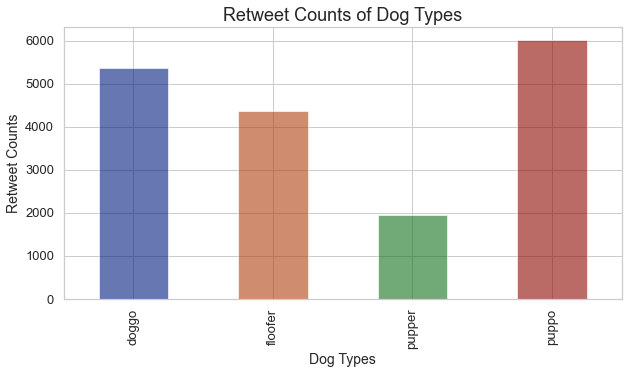

In [120]:
# Plot a bar diagram to visualize which type of dog is more likely to be retweeted.
df.groupby('dog_stages').retweet_count.mean().plot(kind='bar',fontsize=13,figsize=(10,5),color=sns.color_palette('dark'),alpha=.6)
plt.title('Retweet Counts of Dog Types', fontsize=18)
plt.xlabel('Dog Types', fontsize=14)
plt.ylabel('Retweet Counts', fontsize=14)

fig=plt.gcf()
fig.savefig('retweet_type.jpg',bbox_inches='tight')


<div style="font-family:cursive; font-size:16px">
    
> - From the above plot we can say that dogs with `puppo` types are more likely to be retweeted by the user. And this followed by `doggo` and `floofer`.

</div>

In [121]:
# Get the image url of the top three higher retweet_count dogs.
df.loc[df.retweet_count.nlargest(3).index].jpg_url


652    https://pbs.twimg.com/ext_tw_video_thumb/74423...
677    https://pbs.twimg.com/ext_tw_video_thumb/73923...
273      https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

<div style="font-family:cursive; font-size:16px">
    
> - Third higher retweet_count dog's image url is valid, and others are invalid or NaN.

</div>

In [122]:
# Get the third higher retweet_count dog's image.
url = df.loc[df.retweet_count.nlargest(3).index[2]].jpg_url
print(df.loc[df.retweet_count.nlargest(3).index[2]].text)
Image(url=url, width=300, height=300)


Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


<div style="font-family:cursive; font-size:16px">
    
### Visualization 5: Favorite & Dog type

</div>

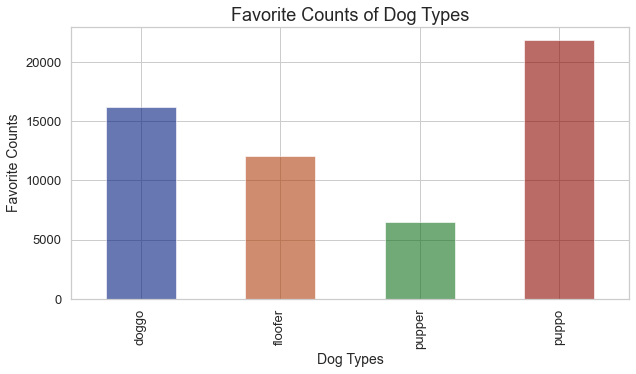

In [123]:
# Plot a bar diagram to visualize which type of dog is more likely to be more favored.
df.groupby('dog_stages').favorite_count.mean().plot(kind='bar',fontsize=13,figsize=(10,5),color=sns.color_palette('dark'),alpha=.6)
plt.title('Favorite Counts of Dog Types', fontsize=18)
plt.xlabel('Dog Types', fontsize=14)
plt.ylabel('Favorite Counts', fontsize=14)
fig=plt.gcf()
fig.savefig('favorite_type.jpg',bbox_inches='tight')


<div style="font-family:cursive; font-size:16px">
    
> - From the above plot we can say that a dog with `puppo` type is more likely to be more favored and this followed by `doggo` and `floofer`.

</div>

In [124]:
# Get the image url of the top three higher favored dog.
df.loc[df.favorite_count.nlargest(3).index].jpg_url


652    https://pbs.twimg.com/ext_tw_video_thumb/74423...
273      https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
98       https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
Name: jpg_url, dtype: object

<div style="font-family:cursive; font-size:16px">
    
> - First image url this is for most favorite dog is invalid.

</div>

In [125]:
# get the image of the second most favored dog.
url = df.loc[df.favorite_count.nlargest(3).index[1]].jpg_url
print(df.loc[df.favorite_count.nlargest(3).index[1]].text)
Image(url=url, width=300, height=300)


Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


</br>

<div style="font-family:cursive; font-size:16px">
    
### Visualization 6: Favorite & Dog Breed

</div>

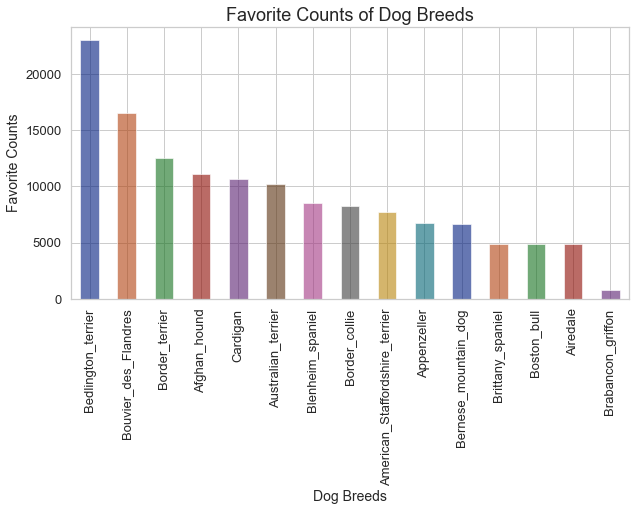

In [127]:
# Plot a bar diagram to create a visualization about the most favored dog type.
df.groupby('predictions').favorite_count.mean().head(15).sort_values(ascending=False).plot(kind='bar',fontsize=13,figsize=(10,5),color=sns.color_palette('dark'),alpha=.6)
plt.title('Favorite Counts of Dog Breeds', fontsize=18)
plt.xlabel('Dog Breeds', fontsize=14)
plt.ylabel('Favorite Counts', fontsize=14)

fig=plt.gcf()
fig.savefig('favorite_breed.jpg',bbox_inches='tight')


<div style="font-family:cursive; font-size:16px">
    
> - `Bedlington_terrier` is the most favored dog breed.

</div>

</br>